# Data Analysis Tutorial: A Beginners Guide 

#### Developed by Katherine Ciaravalli and Ethan Winters

### Introduction

   ##### For this tutorial we will take a look at how to perform Data Collection, Data Processing, Exploratory Data Analysis & Data Visualization, as well as Hypothesis Testing, and Machine Learning on data of your choosing. We have pulled some data about TedTalks beginning in 1972 all the way to 2017 to use as an example of one type of data you can learn from. 

### Getting Started

#### Required Tools
##### For this tutorial we used the following libraries to aid in our analysis. You can see below in the code how we have named them and their uses. 

1. pandas
2. numpy
3. matplotlib.pyplot
4. yaml
5. sklearn.linear_model
6. sklearn.model_selection
7. scipy

Here is some further documentation on some libraries you may be more unfamiliar with:

Yaml : https://yaml.org/spec/1.2/spec.html

Scikit-Learn : https://scikitlearn.org/stable/supervised_learning.html#supervised-learning

SciPy : https://docs.scipy.org/doc/scipy/reference/


In [2]:
#Imports for entire project go up at the top 

import pandas as pd    #Used for formatting data and helpful analysis functions
import numpy as np    #Additional helpful analysis functions
import matplotlib.pyplot as plt    #Plotting functionality for visualization and analysis 
import yaml    #Needed for parsing ratings column in Step 2

from sklearn.linear_model import LinearRegression    #Useful Machine Learning library
from sklearn.model_selection import train_test_split    #To split data during Step 4 
from scipy import stats    #Useful for plotting regression lines


# Step 1: Data Collection
### Dataset
We used a TedTalk data set from kaggle.com, a popular data science resource for both beginners and experts. The data set is very extensive and provides both valuable and less relevant data for the purposes of our analysis. Essentially, the data set has metrics on every TedTalk including the date, amount of views per video, dictionaries for rated buzzwords, and other data that we will discuss more later on. <br><br>

We obtained the data by downloading a CSV file and using the Pandas function for reading a comma separated value file (CSV). Pandas provides a tested and trusted function to do this, so we can avoid struggling to parse the data ourselves! (Tip: Always search helpful libraries for any functions that can save you time). The CSV file is in the same directory as this notebook, which is why the path we specifiy to read it in is just the file name itself. Be sure to include your data file with your anaylsis code for easy access. <br><br>

### Related links
If you are interested in searching Kaggle for some other fascinating data or want to learn more about CSV files click below:

Kaggle data source - https://www.kaggle.com/rounakbanik/ted-talks <br>

Reading in CSV files with Pandas- https://www.datacamp.com/community/tutorials/pandas-read-csv

In [3]:
#Step 1: Data Collection

#use pd.read_csv to read in the "dirty" data into a dataframe. We will clean this data in the next step.
ted_df = pd.read_csv("ted_main.csv")

#display the head of the dataframe for easy viewing and a quick look at the first few rows of the un-clean data
ted_df.head()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,1140912000,35,Majora Carter,Majora Carter: Greening the ghetto,1,1151367060,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550
4,593,You've never seen data presented like this. Wi...,1190,TED2006,1140566400,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,1151440680,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869


# Step 2: Data Processing

Data processing is a crucial step before digging into analysis. It is important to set yourself up with clean, easy to read, and consistent data. This might include improving column names, removing some unwanted data, or changing data types to ease in analysis later on. Sometimes this is referred to as tyding data or data wrangling. 

To read more on tidy data check out this blog post by Jean-Nicholas Hould, he discusses at length the importance of clean data and how to go about fixing some additional problems not included in this tutorial: 
http://www.jeannicholashould.com/tidy-data-in-python.html


### Column Information 
The columns are as follow:
- comments
    - Number: total comments per video
- description
    - String: blurb on what the TedTalk will cover
- duration
    - Number: total time of TedTalk in Seconds
- event
    - String: TedTalk code for Year and location of event
- film_date
    - Unix Date: date when event was filmed
- languages
    - Number: total languages audio is available in
- main_speaker
    - String: Name of person who gave the talk
- name
    - String: main_speaker and title
- num_speaker
    - String: Amount of main_speakers that gave the talk
- published_date
    - Unix Date: Date when video was released online
- ratings
    - String: count of ratings per word on each talk 
- related_talks
    - String: links to other talks similar to current talk
- speaker_occupation
    - String: job title of main_speaker
- tags
    - String: list of words describing talk topic
- title
    - String: title of talk
- url
    - String: link to website containing talk video and transcript
- views
    - Number: total view count for talk


It is clear some of this descritive data will be less helpful when performing analysis so we will want to remove that from the set. Sometimes descriptive data can be converted into a unique number and can be great to make predictions with. For example the 'tags' column would be interesting to transpose into numbers and include in analysis. We have chosen not to include that in this tutorial but further information on descriptive statistics can be found here:
https://www.researchconnections.org/childcare/datamethods/descriptivestats.jsp

The code below demonstrates how to remove unwanted columns from our pandas dataframe. We have also used the function 'Pandas.to_datetime()' to convert the film_date and published_date from Unix-Date to a more readable format, yyyy-mm-dd. We can see when we display the head our condensed dataframe with the columns we will continue to work with.

In [4]:
#Step 2: Data Processing

#in this step we will clean the data so that it can be used more efficiently in later on steps

#drop description
ted_df = ted_df.drop(['description'], axis=1)
#drop event
ted_df = ted_df.drop(['event'], axis=1)

#change film_date from unix time to yyyy-mm-dd
ted_df['film_date'] = pd.to_datetime(ted_df['film_date'],unit='s')

#drop main_speaker
ted_df = ted_df.drop(['main_speaker'], axis=1)
#drop num_speaker
ted_df = ted_df.drop(['num_speaker'], axis=1)
#drop name
ted_df = ted_df.drop(['name'], axis=1)

#change published_date from unix time to yyyy-mm-dd
ted_df['published_date'] = pd.to_datetime(ted_df['published_date'],unit='s')

#drop related_talks
ted_df = ted_df.drop(['related_talks'], axis=1)
#drop speaker_occupation
ted_df = ted_df.drop(['speaker_occupation'], axis=1)
#drop tags
ted_df = ted_df.drop(['tags'], axis=1)
#drop url
ted_df = ted_df.drop(['url'], axis=1)

#Display head to see mostly cleaned data
ted_df.head()  

,comments,duration,film_date,languages,published_date,ratings,title,views
0,4553,1164,2006-02-25,60,2006-06-27 00:11:00,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...",Do schools kill creativity?,47227110
1,265,977,2006-02-25,43,2006-06-27 00:11:00,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...",Averting the climate crisis,3200520
2,124,1286,2006-02-24,26,2006-06-27 00:11:00,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...",Simplicity sells,1636292
3,200,1116,2006-02-26,35,2006-06-27 00:11:00,"[{'id': 3, 'name': 'Courageous', 'count': 760}...",Greening the ghetto,1697550
4,593,1190,2006-02-22,48,2006-06-27 20:38:00,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...",The best stats you've ever seen,12005869


### Specialized Cleaning

We want to use the data that is inside the 'ratings' column however it isn't in a very functional format. When we initially viewed it in the starting dataset it appeared to be a dictionary object with an 'id' identifer number, 'name' for word that was described and 'count' that showed the amount of votes per word. Once we attempted to translate the data into new columns, the 'ratings' column was not a dictionary value but a string, so we needed to hande this. 

Below is the code to properly convert a string in the format {'key':value, ... 'key':value} into a proper dictionary object. We did this with the help of yaml, which was imported above, yaml has an easy function yaml.load() which does the dirty work for us. We then needed to extract the ratings for each word so we can store them in new columns. There were over 20 words that people could rate on in this data, we chose only four: Inspiring, Funny, Informative, and Fascinating. Feel free to extract counts for other words and see how they compare! Our new function, 'split_rating' acheives all of this and returns an array with each corresponding count for \[inspiring, funny, informative, fascinating\]. Lastly, we loaded in those values row by row and inserted them into our four new columns, 'insp_rating', 'fun_rating', 'inf_rating', and 'fasc_rating'.

We dropped the old ratings column as we no longer need it and displayed the head of the data to make sure we acheived the last bit of our tidying. 


In [5]:
#we will write a function to split the ratings column into their own columns to be used later called split_ratings

def split_ratings(row):    #feed in a row of the dataframe
    r = row['ratings']
    values = yaml.load(r)    #transform the string dictionary representation to an actual dictionary
    insp_count = 0    #initialize counts for words that we decided to track
    fun_count = 0
    inf_count = 0
    fasc_count = 0
    for word_rating in values:    #loop through dictionary and pick out values of words we care about
        if word_rating['id'] == 10:    #inspiring
            insp_count = word_rating['count']
        if word_rating['id'] == 7:    #funny
            fun_count = word_rating['count']
        if word_rating['id'] == 8:    #informative
            inf_count = word_rating['count']
        if word_rating['id'] == 22:    #fascinating
            fasc_count = word_rating['count']
    return [insp_count, fun_count, inf_count, fasc_count]    #return a list of values to apply to dataframe

for index, row in ted_df.iterrows():
    values = split_ratings(row)    #call above function on row, store the list of 4 values in "values" variable
    ted_df.set_value(index,'insp_rating',values[0])    #set new dataframe column values accordingly for counts of words
    ted_df.set_value(index,'fun_rating',values[1])
    ted_df.set_value(index,'inf_rating',values[2])
    ted_df.set_value(index,'fasc_rating',values[3])

#drop ratings, since we made new columns with the data we want
ted_df = ted_df.drop(['ratings'], axis=1)
#show head
ted_df.head()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:23: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:24: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:25: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:26: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


,comments,duration,film_date,languages,published_date,title,views,insp_rating,fun_rating,inf_rating,fasc_rating
0,4553,1164,2006-02-25,60,2006-06-27 00:11:00,Do schools kill creativity?,47227110,24924.0,19645.0,7346.0,10581.0
1,265,977,2006-02-25,43,2006-06-27 00:11:00,Averting the climate crisis,3200520,413.0,544.0,443.0,132.0
2,124,1286,2006-02-24,26,2006-06-27 00:11:00,Simplicity sells,1636292,230.0,964.0,395.0,166.0
3,200,1116,2006-02-26,35,2006-06-27 00:11:00,Greening the ghetto,1697550,1070.0,59.0,380.0,132.0
4,593,1190,2006-02-22,48,2006-06-27 20:38:00,The best stats you've ever seen,12005869,2893.0,1390.0,5433.0,4606.0


# Step 3: Exploratory Data Analysis & Data Visualization

A very exciting part of data science is being able to translate large datasets like the one we have been working with and make it readable to people outside the field. This is best achived by generating visualizations that are clean, beautiful and easily understandable by anyone looking to grasp the information. During Exploratory Data Analysis (EDA), you have already received the data, cleaned it, sorted it, and now its time to create other features you wish that take your data to the next level. From here we can begin to see the relationship between certain variables, the correlation (if any) between features, and continue to generate more visualization in order to better display the data at hand. This all needs to happen before you create prediction models in the Machine Learning portion of this tutorial.

A great post on "Towards Data Science" found here,

https://towardsdatascience.com/visualizing-your-exploratory-data-analysis-d2d6c2e3b30e

gives a great desription and definition of EDA.

________

EDA is an approach to data analysis that uses a variety of techniques, largely visual, to: Maximize insight, reveal underlying structure, check for outliers, test assumptions, and determine optimal factors. It is an approach to analysis of your data that delays the usual assumptions of what kind of model should be used and instead allows the data to speak for itself.

________


### Beginning to code visualizations:

We will now begin the preliminary stage of our data analysis. It is vital to familiarize yourself with the basics before digging into more extensive assessments. We first want to grab some quick facts about our data so we pulled some totals and averages to get a gauge on what to expect as we continue working with this information. 


In [6]:
#Step 3: Exploratory Data Analysis & Data Visualization
#lets take a look at some data points first, and get more familiar with our data

#how many data points (rows) do we have?
print("Total Data Points: ")
print (len(ted_df))

#what is the average duration of a ted talk (in seconds)?
print("Average duration of TedTalk (seconds): ")
print (ted_df['duration'].mean())

#what is the standard deviation for duration of a ted talk (in seconds)?
print("Standard Deviation for Duration (seconds): ")
print (ted_df['duration'].std())

#what is the average amount of comments on a ted talk?
print("Average of amount of comments: ")
print (ted_df['comments'].mean())

Total Data Points: 
2550
Average duration of TedTalk (seconds): 
826.510196078
Standard Deviation for Duration (seconds): 
374.009138019
Average of amount of comments: 
191.562352941


### Plotting a Bar Chart

This is where our library "matplotlib.pyplot as plt" comes in handy and allows simple one liners to create beautiful graphs as well as functions to support further adjustments and modifications.

#### TedTalks per Month

We wanted to determine what month TedTalks happpen during the most. To do this we need to plot a histogram with count of each TedTalk and group them by the month they were filmed. The 'groupby' function can help up do this (as shown below) and it is easy to grab just the month with 'Date.dt.month' since we spent that time converting the date earlier in Step 2. We establish we want out plot to be a bar graph and from here you could display your final product. 

To label your graph with nicer/professional titles, just use the .xlabel, .ylabel, and .title functions shows below. This adds clarity in what the graph is displaying and will be useful when showing off your visualization to others.

To gain more insight on bar charts and how else they can be displayed, check out this demo:

https://matplotlib.org/gallery/statistics/barchart_demo.html



Text(0.5,1,'Number of Ted Talks Produced Per Month Overall')

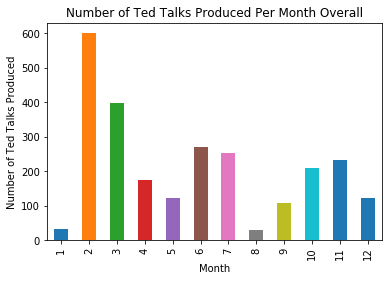

In [7]:
#we will plot a bar graph for the number ted talks done for each month over all ted talks

#we use a groupby function to group the dataframe by month on film date
ted_df.groupby(ted_df["film_date"].dt.month)['film_date'].count().plot(kind="bar")

#Edit labels 
plt.ylabel('Number of Ted Talks Produced')
plt.xlabel('Month')
plt.title('Number of Ted Talks Produced Per Month Overall')

#### TedTalks per Year

Similiary, if you wanted to view how many TedTalks were given per year, you would approach to data in the same fashion. This time, grouping by 'dt.year' instead of month and labeling your axes accordingly. 

Text(0.5,1,'Number of Ted Talks Produced Per Year Overall')

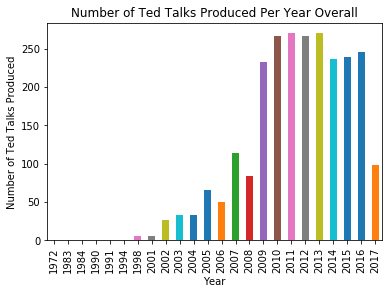

In [8]:

#now we will plot a bar graph for the number ted talks done for each year over all ted talks

#we use a groupby function to group the dataframe by year on film date
ted_df.groupby(ted_df["film_date"].dt.year)['film_date'].count().plot(kind="bar")

#Edit labels 
plt.ylabel('Number of Ted Talks Produced')
plt.xlabel('Year')
plt.title('Number of Ted Talks Produced Per Year Overall')

#### Comments versus Views  Pie Chart

This is just another example of the type of graph you can build using matplotlib.

Text(0.5,1,'Number of Comments Each Year on Ted Videos')

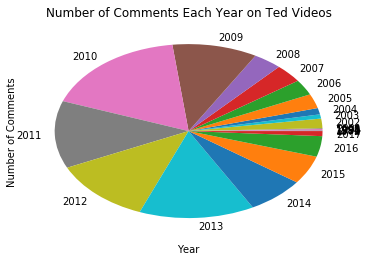

In [9]:
#lets take a look at the amount of comments over the years
ted_df.groupby(ted_df["film_date"].dt.year)['comments'].sum().plot(kind="pie")
plt.ylabel('Number of Comments')
plt.xlabel('Year')
plt.title('Number of Comments Each Year on Ted Videos')

### Plotting a Scatter Plot

Next, we wanted to see a relationships between how many langues a TedTalk was offered in and how many views it received. For this, we need are going to plot a scatter plot with the available number of languages and views. 

#### Languages versus Views
The 'views' category has very large numbers that appear on the graph in an ugly way. To avoid unattractive labels, we have scaled down the amount of views by 1,000,000 and labeled the axis  with '(millions)' appropriately. For this graph we do not need to groupby any specific category since each data point in the dataframe will be plotted. 

Charts and graphs are an incredible vital part of Business and the future. It can be a useful tool in aiding marketing teams and making strategic decisions. The link below and a video that goes indepth on how graphs and charts play a role in real world applications.

<p><a href="https://study.com/academy/lesson/graphs-charts-in-business-importance-use-examples.html?wvideo=r4jeoaeedz"><img src="/cimages/videopreview/videopreview-full/ht6g9vn7xd.jpg" width="400" height="225" style="width: 400px; height: 225px;"></a></p><p><a href="https://study.com/academy/lesson/graphs-charts-in-business-importance-use-examples.html?wvideo=r4jeoaeedz">Graphs &amp; Charts in Business: Importance, Use &amp; Examples - Video &amp; Lesson Transcript | Study.com</a></p>

Text(0.5,1,'Number of Views Versus Languages Available')

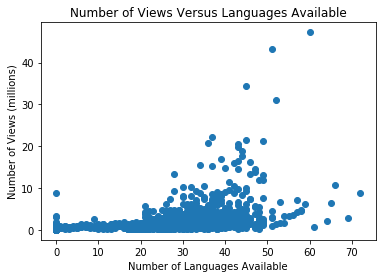

In [10]:
#now we will plot the amount of languages the talk is available in vs the amount of total views
plt.scatter(ted_df['languages'], ted_df['views']/1000000)

# labeling
plt.ylabel('Number of Views (millions)')
plt.xlabel('Number of Languages Available')
plt.title('Number of Views Versus Languages Available')

# Step 4: Analysis, Hypothesis Tests, and Machine Learning

### Models Trained
In this section, we will train two models. One model will be used to predict views based on rating buzzword counts, and the other will be used to predict the number of comments on the ted talk.

### Training Algorithms
We will use linear regression models for all of our models. This is because we are not trying to classify data into sets, but instead predict the actual value of a particular variable.

### Related Links
A great overview of linear regression: https://towardsdatascience.com/linear-regression-detailed-view-ea73175f6e86 <br>


In [11]:
#Step 4: Analysis, Hypothesis Testing, and Machine Learning 
#we want to be able to predict the amount of views/comments that a ted talk will have based on the rating counts of the buzzwords
#that we selected (inspiring, funny, informative, fascinating)

### Before we get into the hard stuff
Let's make sure that we have an evident correlation between our ratings and views/comments. To do this we can plot the data along with a line that we generate using a linear regression module from the `stats` library. We are looking for data points that generally move in the same direction, and have few outliers.

Text(0.5,1,'Number of Views Versus Inspiration Rating Count')

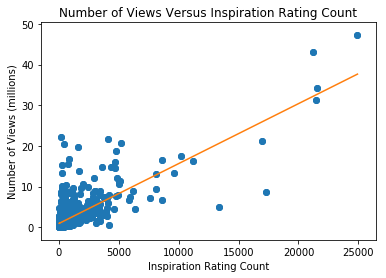

In [12]:
#Now, lets look at the simple relationships between the buzzwords we selected and views, which we will examine further
#in the machine learning portion
#calculate the slope and intercept of the regression line using the stats library
#divide views by 1000000 to make the data easier to read
slope, intercept, r_value, p_value, std_err = stats.linregress(ted_df['insp_rating'],ted_df['views']/1000000)
#make a line in the form of y=mx+b
line = slope*ted_df['insp_rating']+intercept
#plot the line
plt.plot(ted_df['insp_rating'],ted_df['views']/1000000,'o', ted_df['insp_rating'], line)
#plot the relationship
plt.scatter(ted_df['insp_rating'], ted_df['views']/1000000)
plt.ylabel('Number of Views (millions)')
plt.xlabel('Inspiration Rating Count')
plt.title('Number of Views Versus Inspiration Rating Count')

Text(0.5,1,'Number of Views Versus Funny Rating Count')

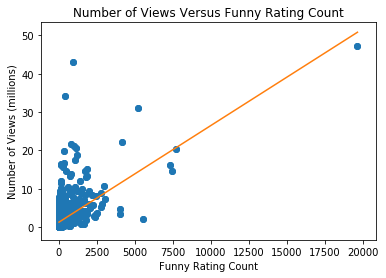

In [13]:
slope, intercept, r_value, p_value, std_err = stats.linregress(ted_df['fun_rating'],ted_df['views']/1000000)
line = slope*ted_df['fun_rating']+intercept
plt.plot(ted_df['fun_rating'],ted_df['views']/1000000,'o', ted_df['fun_rating'], line)
plt.scatter(ted_df['fun_rating'], ted_df['views']/1000000)
plt.ylabel('Number of Views (millions)')
plt.xlabel('Funny Rating Count')
plt.title('Number of Views Versus Funny Rating Count')

Text(0.5,1,'Number of Views Versus Informative Rating Count')

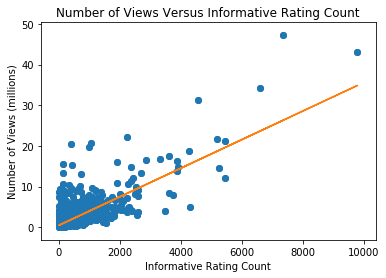

In [14]:
slope, intercept, r_value, p_value, std_err = stats.linregress(ted_df['inf_rating'],ted_df['views']/1000000)
line = slope*ted_df['inf_rating']+intercept
plt.plot(ted_df['inf_rating'],ted_df['views']/1000000,'o', ted_df['inf_rating'], line)
plt.scatter(ted_df['inf_rating'], ted_df['views']/1000000)
plt.ylabel('Number of Views (millions)')
plt.xlabel('Informative Rating Count')
plt.title('Number of Views Versus Informative Rating Count')

Text(0.5,1,'Number of Views Versus Fascinating Rating Count')

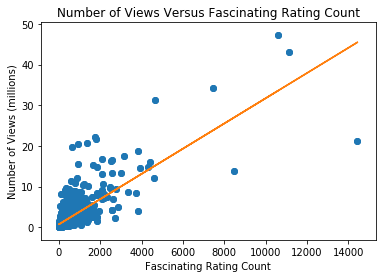

In [15]:
slope, intercept, r_value, p_value, std_err = stats.linregress(ted_df['fasc_rating'],ted_df['views']/1000000)
line = slope*ted_df['fasc_rating']+intercept
plt.plot(ted_df['fasc_rating'],ted_df['views']/1000000,'o', ted_df['fasc_rating'], line)
plt.scatter(ted_df['fasc_rating'], ted_df['views']/1000000)
plt.ylabel('Number of Views (millions)')
plt.xlabel('Fascinating Rating Count')
plt.title('Number of Views Versus Fascinating Rating Count')

### It looks like there is a relationship for each rating buzzword!
The data points and regression lines all indicate a positive relationship between our buzzwords and the number of views. It makes sense that the more people who describe a video as funny, the more views it will likely receive. Now that we have this information, let's train a model to predict view count based on buzzword totals!

In [16]:
#Train a machine learning model to estimate the amount of views based on buzzword counts
#split the data into train and test data
train, test = train_test_split(ted_df, test_size=0.2)
#create our model object
clf = LinearRegression()
#train the model on the training data and then make a prediction for the test data
clf.fit(train[['insp_rating', 'fun_rating', 'inf_rating', 'fasc_rating']], train['views'])
predicted = clf.predict(test[['insp_rating', 'fun_rating', 'inf_rating', 'fasc_rating']])

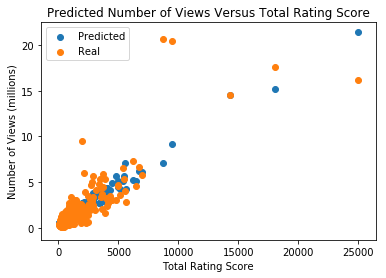

In [22]:
#Plot the test data as a score along with the predicted values. Observe the linear relationship!
a = plt.scatter(test['insp_rating']+test['fun_rating']+test['inf_rating']+test['fasc_rating'], predicted/1000000)
b = plt.scatter(test['insp_rating']+test['fun_rating']+test['inf_rating']+test['fasc_rating'], test['views']/1000000)
plt.ylabel('Number of Views (millions)')
plt.xlabel('Total Rating Score')
plt.title('Predicted Number of Views Versus Total Rating Score')
plt.legend((a, b), ('Predicted', 'Real'))

The above output indicates that we have predicted the data in a similar pattern to the original test data! With the predictions mapped in blue, and the orignial data in orange, it is evident that out model can predict views moderately well from these buzzwords. One observation that jumps out is that our model is bad at mapping outliers, and preficts most of its points close to the imaginary line of best fit for the blue markings.

In [23]:
#Train a machine learning model to estimate the amount of comments based on buzzword counts
clf2 = LinearRegression()
clf2.fit(train[['insp_rating', 'fun_rating', 'inf_rating', 'fasc_rating']], train['comments'])
predicted2 = clf2.predict(test[['insp_rating', 'fun_rating', 'inf_rating', 'fasc_rating']])

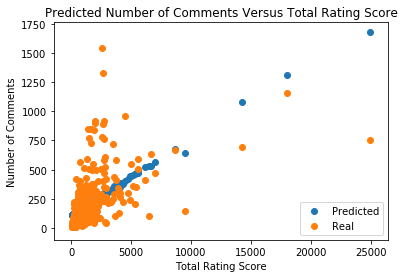

In [24]:
a2 = plt.scatter(test['insp_rating']+test['fun_rating']+test['inf_rating']+test['fasc_rating'], predicted2)
b2 = plt.scatter(test['insp_rating']+test['fun_rating']+test['inf_rating']+test['fasc_rating'], test['comments'])
plt.ylabel('Number of Comments')
plt.xlabel('Total Rating Score')
plt.title('Predicted Number of Comments Versus Total Rating Score')
plt.legend((a2, b2), ('Predicted', 'Real'))

# Step 5: Insights and Conclusions

Even though you may feel as thought you have finished once you have all your graphs and models, there is still insight to be drawn. Using what you have creaed it is imperative that you can put it into context and find value in what you have extracted. 

#### Ask yourself: what can we learn?

Our graphs from Step 3, although simple can give us some useful information. 

- It is clear the first bar graph shows February as being the peak time for giving TedTalks. In context, this could be useful for a marketing team to amp up TedTalks given in other months as to spread around their events and engage the maximum amount of people year round. 

- Our next bar graph tells us that between 2010 and 2013, TedTalks were booming, with a significant increase in events during 2009. We can also see a dip beginning in 2014, indicating some event since the numbers never rose again. 

- The pi chart shows a significant portion of the comments being made between those peak years. Visualizing data in a pi chart gives the viewer a physical idea of how proportions are distributed in the data. 

- For the simple scatter plot, we can see a consensed bit of data with views under 10 million are spread out acorss languages. However, there are still significant data points that show videos with more language options also have more views. We can see based off this chart the begginings of a linear relationship, adding an additional linear regression line would help better view this positive correlation. 

During the Machine Learning portion in Step 4, we can gain even more knowledge about this data:

- First we showed a scatter plot with the added linear regression line. For the ratings on Inspiration, Fascinating, Funny, and Informative, we can see that there are more views for higher ratings. The LR line helps to visualize this trend and can give us some indication of future predictions. 

- After we trained a model on this data, we were able to get some more riveting insight. Our graph shows what the view count would be if videos had a very large combined rating score. We can see that our model remained pretty linear with some variation and is similar yet more refined to the real data. 

- There is also definitly a strong relationship between comments and ratings. The model we fit gives a great representation of how ratings will predict amount of comments on a TedTalk. 

### Future Work with This Dataset

After spending some time with this dataset there are definitly more relationships to be found and more insight to draw. For the machine learning portion of this tutorial we only focused on four rating words however there are significantly more words and descriptions that we can pull from to learn more about how ratings effect TedTalk views. It would be interesting to see how more negatively associated words would effect comments and views and how TedTalk can change their strategy to lower these ratings. There were not very many negative words included in this dataset however if TedTalk did decide to allow users to rate on words like "Boring" or "Uninteresting", data scientist would be able to figure out how this is effecting their overall view count and how they can improve their numbers elsewhere. 

### Lastly, here are some links to our favorite TedTalks from completing this tutorial, Enjoy!

## https://www.ted.com/talks/brene_brown_on_vulnerability

## https://www.ted.com/talks/tim_urban_inside_the_mind_of_a_master_procrastinator

